# Clasificador de Vinos con KNN 🍷
Proyecto para predecir la calidad del vino usando K-Nearest Neighbors.

## Consigna:
Entrena un modelo de K-Vecinos más Cercanos (KNN) para predecir la calidad de un vino tinto a partir de sus características químicas. ¿Podría una IA ayudarte a elegir un vino digno de sommelier?

Utilizaremos el siguiente dataset de vinos tintos extraido de Wine Quality Data Set - UCI  
https://raw.githubusercontent.com/rosinni/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## A. Carga los datos. 
Carga el CSV con Pandas y explora su estructura.

In [58]:
# 1. Cargar los datos
url = "https://raw.githubusercontent.com/rosinni/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
df = pd.read_csv(url, sep=";")
df.sample(10, random_state=2025)  # Muestra aleatoria de 10 filas 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1462,6.8,0.6,0.0,2.3,0.1,14.0,31.0,1.0,3.4,0.6,10.4,6
1162,8.5,0.3,0.4,2.3,0.1,12.0,19.0,1.0,3.1,0.7,11.8,7
412,7.1,0.7,0.2,1.9,0.1,15.0,77.0,1.0,3.3,0.6,9.3,5
527,7.0,0.4,0.5,2.5,0.1,33.0,85.0,1.0,3.4,0.8,11.4,6
1176,6.5,0.9,0.0,5.6,0.1,23.0,47.0,1.0,3.6,0.5,11.2,4
1139,8.2,0.5,0.2,2.0,0.1,16.0,86.0,1.0,3.3,0.6,9.5,6
1556,6.6,0.9,0.0,2.2,0.1,12.0,20.0,1.0,3.5,0.6,9.9,5
971,10.4,0.3,0.5,1.9,0.1,6.0,10.0,1.0,3.3,0.9,10.9,6
88,9.3,0.4,0.4,2.1,0.1,34.0,125.0,1.0,3.1,1.2,9.5,5
1128,10.0,0.4,0.3,2.7,0.1,28.0,89.0,1.0,3.2,0.7,10.0,5


**DICCIONARIO:**

**Descripción de las columnas**

Cada fila representa un vino. Las columnas describen su composición química:
*    fixed acidity, volatile acidity, citric acid
*    residual sugar, chlorides
*    free sulfur dioxide, total sulfur dioxide
*    density, pH, sulphates, alcohol

La columna objetivo es label:
*    0 = Baja calidad
*    1 = Calidad media
*    2 = Alta calidad

In [59]:
# Crear la columna 'label' categorizando 'quality'
def quality_to_label(q):
    if q <= 4:
        return 0  # baja
    elif q <= 6:
        return 1  # media
    else:
        return 2  # alta

df['label'] = df['quality'].apply(quality_to_label)
df.sample(10, random_state=2025)  # Muestra aleatoria de 10 filas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
1462,6.8,0.6,0.0,2.3,0.1,14.0,31.0,1.0,3.4,0.6,10.4,6,1
1162,8.5,0.3,0.4,2.3,0.1,12.0,19.0,1.0,3.1,0.7,11.8,7,2
412,7.1,0.7,0.2,1.9,0.1,15.0,77.0,1.0,3.3,0.6,9.3,5,1
527,7.0,0.4,0.5,2.5,0.1,33.0,85.0,1.0,3.4,0.8,11.4,6,1
1176,6.5,0.9,0.0,5.6,0.1,23.0,47.0,1.0,3.6,0.5,11.2,4,0
1139,8.2,0.5,0.2,2.0,0.1,16.0,86.0,1.0,3.3,0.6,9.5,6,1
1556,6.6,0.9,0.0,2.2,0.1,12.0,20.0,1.0,3.5,0.6,9.9,5,1
971,10.4,0.3,0.5,1.9,0.1,6.0,10.0,1.0,3.3,0.9,10.9,6,1
88,9.3,0.4,0.4,2.1,0.1,34.0,125.0,1.0,3.1,1.2,9.5,5,1
1128,10.0,0.4,0.3,2.7,0.1,28.0,89.0,1.0,3.2,0.7,10.0,5,1


## B. Entrena el modelo KNN:

1. Separa las variables independientes (X) del objetivo (y).
2. Divide en conjunto de entrenamiento y prueba (80/20).
3. Escala los datos si es necesario (¡muy recomendable con KNN!).
4. Entrena el modelo con un valor de k inicial.
5. Hacer predicciones en el conjunto de prueba.

In [60]:
# B1. Separar variables independientes (X) y la variable objetivo (y)
X = df.drop(["label", "quality"], axis=1)
y = df["label"]

In [61]:
# B2. Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# B3. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# B4. Entrenar el modelo con k inicial = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [64]:
# B5. Model prediction
# Once the model has been trained, it can be used to predict with the test data set.
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,

## C. Evalúa el rendimiento usando:
1. accuracy_score
2. confusion_matrix
3. classification_report

In [ ]:
# C1. Evaluar el Rendimiento del Modelo con la Metrica de Precisión

accuracy = accuracy_score(y_test, y_pred) # Calcular la precisión 
print(f"ACCURACY:\n {accuracy:.4f}\n")



print("CLASSIFICATION REPORT:")            # Reporte de clasificación
print(classification_report(y_test, y_pred))

ACCURACY:
 0.8438

CONFUSION MATRIX:
[[  0  11   0]
 [  1 250  11]
 [  0  27  20]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      0.95      0.91       262
           2       0.65      0.43      0.51        47

    accuracy                           0.84       320
   macro avg       0.50      0.46      0.47       320
weighted avg       0.81      0.84      0.82       320



CONFUSION MATRIX:
[[  0  11   0]
 [  1 250  11]
 [  0  27  20]]


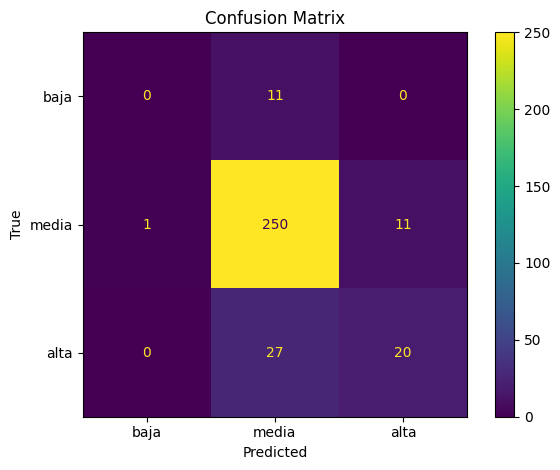

In [ ]:
# C2 . Evaluar el Rendimiento del Modelo con la Metrica de Confusion Matrix
print("CONFUSION MATRIX:")                 
print(confusion_matrix(y_test, y_pred)) 
# print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

# Visualizar la Matriz de Confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred , display_labels=["baja", "media", "alta"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')   
plt.show()


# 🔍 ¿Qué representa la matriz?

# Cada fila representa la clase real (verdadera), y cada columna representa la clase predicha por el modelo.

# En este caso, las clases son:

#     baja

#     media

#     alta

# 📊 Cómo leerla

# Veamos cómo interpretar las celdas:
# 	Pred. baja	Pred. media	Pred. alta
# Real baja	0	11	0
# Real media	1	250	11
# Real alta	0	27	20
# ✅ Casos correctamente clasificados (diagonal principal)

#     baja–baja: 0 → el modelo no clasificó correctamente ninguna instancia "baja".

#     media–media: 250 → el modelo clasificó correctamente 250 instancias "media".

#     alta–alta: 20 → el modelo clasificó correctamente 20 instancias "alta".

# ❌ Casos mal clasificados (fuera de la diagonal)

#     11 veces el modelo confundió "baja" con "media".

#     11 veces confundió "media" con "alta".

#     27 veces confundió "alta" con "media".

#     Y así sucesivamente...

# 📈 ¿Qué podemos concluir?

#     El modelo reconoce muy bien la clase "media" (250 aciertos).

#     Tiene problemas importantes con la clase "baja" (0 aciertos).

#     Confunde frecuentemente "alta" con "media" (27 veces).

#     Hay un desequilibrio: pocas instancias de "baja" y "alta" comparado con "media".

## D. Optimización de k. 
1. Crea un bucle para probar diferentes valores de k (por ejemplo, de 1 a 20).
2. Guarda los resultados en una lista.
3. Grafica accuracy vs k para encontrar el mejor valor.


In [ ]:
# 6. Búsqueda del mejor valor de k
k_range = range(1, 21)
accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_k_pred = model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_k_pred))

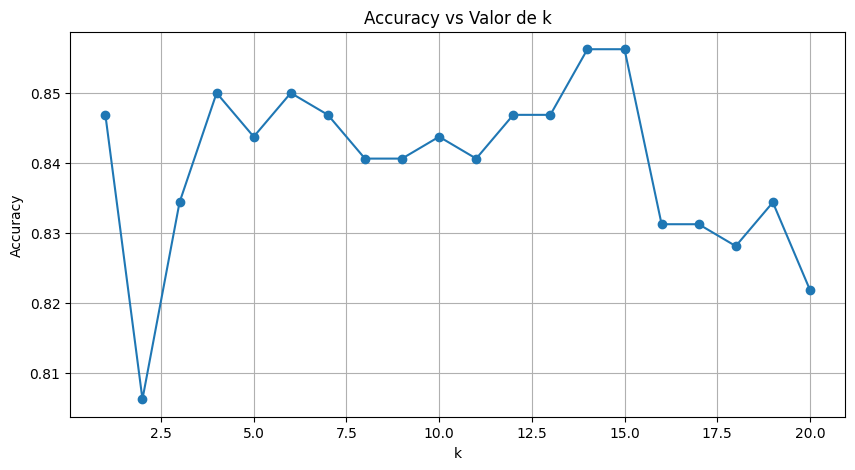

In [ ]:
# 7. Graficar accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("Accuracy vs Valor de k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
# 8. Elegir el mejor k
best_k = k_range[accuracies.index(max(accuracies))]
print(f"Mejor valor de k: {best_k}")

Mejor valor de k: 14


In [ ]:
# 9. Entrenar modelo final
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=14)

In [ ]:
# 10. Función para predecir calidad del vino
def predict_wine_quality(features):
    features_scaled = scaler.transform([features])
    pred = final_knn.predict(features_scaled)[0]
    if pred == 0:
        return "Este vino probablemente sea de baja calidad 🍷"
    elif pred == 1:
        return "Este vino probablemente sea de calidad media 🍷"
    else:
        return "Este vino probablemente sea de alta calidad 🍷"

In [ ]:
# 11. Prueba de la función
resultado = predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076,
                                  11.0, 34.0, 0.9978, 3.51, 0.56, 9.4])
print("\nPredicción de ejemplo:", resultado)


Predicción de ejemplo: Este vino probablemente sea de calidad media 🍷


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
